# Invoice NER with FT [LayoutLMv3](https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice)

In [1]:
from transformers import LayoutLMv3ForTokenClassification, AutoProcessor
from datasets import load_from_disk

import lovely_tensors as lt

from src.config import init_config
from src.invoice import process_invoice

## Config and settings

In [2]:
lt.monkey_patch()

In [3]:
config = init_config()

In [4]:
print(config)

data:
  fatura: mathieu1256/FATURA2-invoices
  rvl_cdip_subset: jinhybr/rvl_cdip_400_train_val_test
  invoiceXpert:
    hf_path: wiF0n/InvoiceXpert
    local_path: data/invoiceXpert
    num_labels: 2
    label_col: label
    image_col: image
    label_names:
    - invoice
    - not-invoice
models:
  classification:
    oob:
      pt: microsoft/dit-base
      ft: microsoft/dit-base-finetuned-rvlcdip
  retrieval:
    layoutlmv3: microsoft/layoutlmv3-base
    layoutlmv3_invoice_ft: Theivaprakasham/layoutlmv3-finetuned-invoice
mlflow:
  experiments:
    classification: invoice-classification
utils:
  seed: 420
  run_date: 2024-05-02/25/24



## Load the data

In [5]:
invoice_df = load_from_disk(config.data.invoiceXpert.local_path)

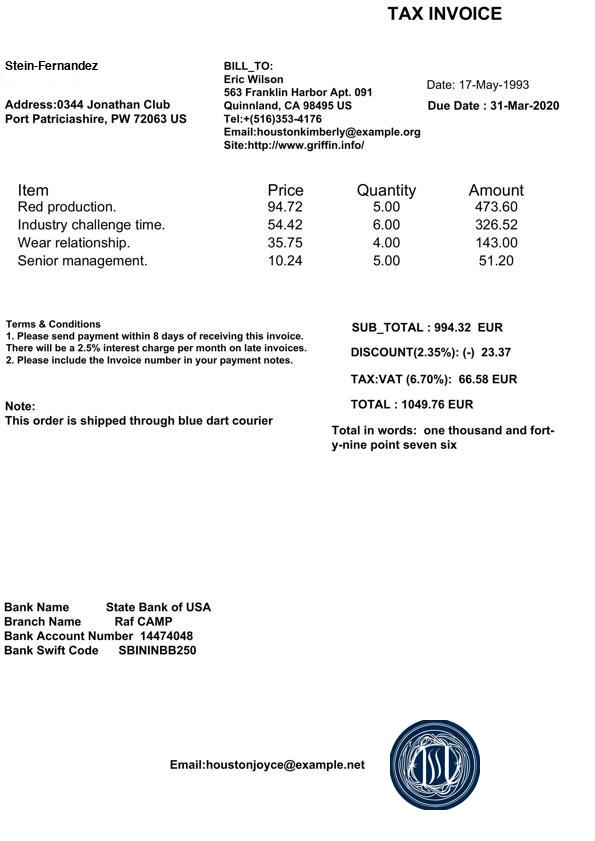

In [6]:
test_image = invoice_df["test"][1250]["image"]
test_image

## Load model

In [7]:
processor = AutoProcessor.from_pretrained(config.models.retrieval.layoutlmv3, apply_ocr=True)

In [12]:
model = LayoutLMv3ForTokenClassification.from_pretrained(config.models.retrieval.layoutlmv3_invoice_ft)

## Scoring

In [17]:
image, final_predicion = process_invoice(invoice_df["test"][1250]["image"], processor, model)

/home/david/code/InvoiceXpert/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


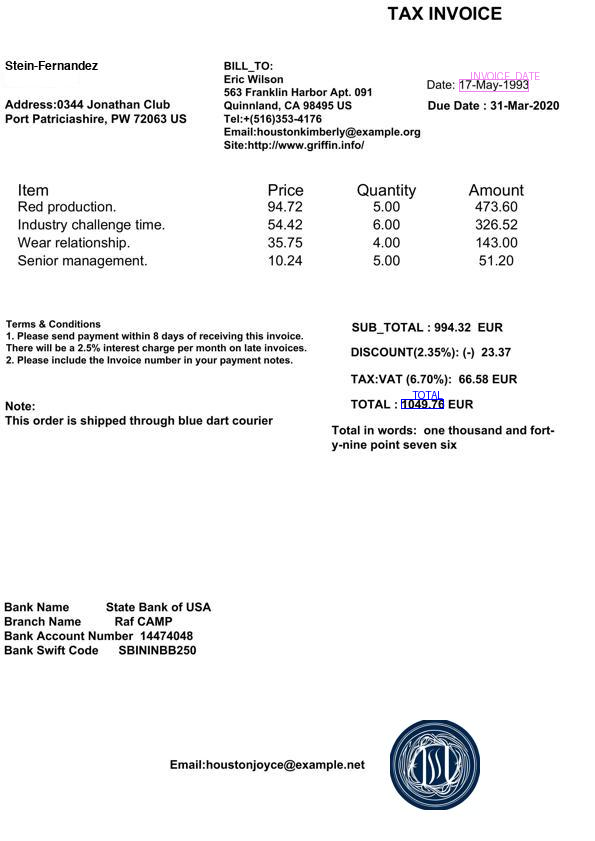

In [18]:
image

In [19]:
final_predicion

[{'word': ' 17-May-1993,',
  'label': 'INVOICE_DATE',
  'box': [459.935, 79.895, 528.955, 91.669]},
 {'word': ' 1049.76',
  'label': 'TOTAL',
  'box': [401.625, 399.47499999999997, 443.87, 408.726]}]